In [16]:
import os
from collections import Counter

files = os.listdir("ImageCollection")
files = [filename[:4] for filename in files]

power_files = os.listdir("PowerCollection")
power_files = [filename[-8:-4] for filename in power_files]

file_counter = Counter(files)
power_counter = Counter(power_files)

file_counter = dict(file_counter)
power_counter = dict(power_counter)
for key in power_counter.keys():
    if key not in file_counter:
        print(key)

aa4q
aa4r


In [10]:
import os
import re

def get_filelist(path):
    Filelist = []
    for home, dirs, files in os.walk(path):
        for filename in files:
            Filelist.append(os.path.join(home, filename))
    return Filelist

path = "F:\Enhancement\mksz393 - Django入门到进阶-更适合Python小白的系统课程"
Filelist = get_filelist(path)

for filepath in Filelist:
    oldfilepath = filepath
    (path, filename) = os.path.split(filepath)
    filename = filename.replace("【更多IT教程 微信dbaxxa】", "")
    # info = re.compile('[0-9][0-9]-[0-9]')
    # if re.match(info, filename) is not None:
    #     id = str(re.match(info, filename).group()) + " "
    #     filename = info.sub(id, filename)
    newfilepath = os.path.join(path, filename)

    os.rename(oldfilepath, newfilepath)

In [2]:
import os

filepath = 'PowerCollection/Label_heightmap'
filenames = os.listdir(filepath)
for files in filenames:
    if files.startswith("0"):
        new_files = "000" + files
        os.rename(os.path.join(filepath, files), os.path.join(filepath, new_files))

(64, 512)
[[ 4.92218  4.92218  4.92218 ...  4.4534   4.4534   4.4534 ]
 [ 4.74561  4.73548  4.72629 ...  4.3561   4.34654  4.33702]
 [ 4.52369  4.51451  4.50437 ...  4.2765   4.28316  4.2892 ]
 ...
 [-0.19209 -0.17824 -0.16495 ...  0.46878  0.46877  0.46878]
 [-0.20657 -0.18497 -0.16398 ...  0.46878  0.46878  0.46878]
 [-0.16115 -0.13981 -0.11901 ...  0.46877  0.46878  0.46877]]
(404750336,)


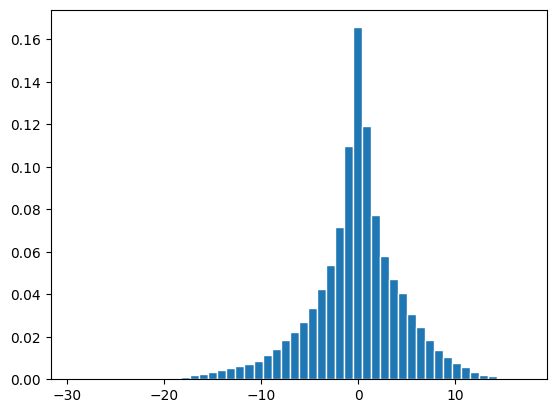

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os

filepath = 'PowerCollection/Label_heightmap'
filenames = os.listdir(filepath)
mats = []

for files in filenames:
    mat = np.load(os.path.join(filepath, files))
    mats.append(mat)

print(mats[0].shape)
print(mats[0])
final_array = np.concatenate([np.array(mat).flatten() for mat in mats])
print(final_array.shape)

plt.hist(final_array, bins=50, density=True, range=(final_array.min(), final_array.max()), edgecolor='white')
plt.show()

In [5]:
import pandas as pd
import os

filepath = 'PowerCollection'
filenames = os.listdir(filepath)
original_data = None

for file in filenames:
    if file.endswith('.csv'):
        df = pd.read_csv(os.path.join(filepath, file), dtype={'terrainID': str})
        original_data = pd.concat([original_data, df], ignore_index=True, axis=0)

original_data.drop("current_height", axis=1, inplace=True)
original_data.drop("image_height", axis=1, inplace=True)
original_data.to_csv("power_data_test.csv", index=None)

In [9]:
import numpy as np
import os
np.set_printoptions(suppress=True)

path = 'PowerCollection/Label_heightmap_normalized'
filenames = os.listdir(path)
arr = np.load(os.path.join(path, filenames[0]))

arr


array([[ 0.16407267,  0.16407267,  0.16407267, ...,  0.14844667,
         0.14844667,  0.14844667],
       [ 0.158187  ,  0.15784933,  0.157543  , ...,  0.14520333,
         0.14488467,  0.14456733],
       [ 0.15078967,  0.15048367,  0.15014567, ...,  0.14255   ,
         0.142772  ,  0.14297333],
       ...,
       [-0.006403  , -0.00594133, -0.00549833, ...,  0.015626  ,
         0.01562567,  0.015626  ],
       [-0.00688567, -0.00616567, -0.005466  , ...,  0.015626  ,
         0.015626  ,  0.015626  ],
       [-0.00537167, -0.00466033, -0.003967  , ...,  0.01562567,
         0.015626  ,  0.01562567]])